In [10]:
import os

# Check if the file exists in the directory
print("File exists:", os.path.exists('abc_company_data.csv'))


File exists: True


In [12]:
import pandas as pd

df = pd.read_csv('abc_company_data.csv')
print("Dataset loaded successfully!")
print(df.head())  # Display first few rows


Dataset loaded successfully!
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [14]:
print("Columns in dataset:", df.columns)



Columns in dataset: Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [16]:
import numpy as np

# Replace 'height' column with random values between 150 and 180
np.random.seed(42)
df['height'] = np.random.randint(150, 181, size=len(df))

# Check updated values
print("Updated height column stats:\n", df['height'].describe())
print(df.head())  # Display the first few rows after modification


Updated height column stats:
 count    458.000000
mean     165.085153
std        9.412232
min      150.000000
25%      156.250000
50%      165.000000
75%      174.000000
max      180.000000
Name: height, dtype: float64
            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  height  
0              Texas  7730337.0     156  
1          Marquette  6796117.0     169  
2  Boston University        NaN     178  
3      Georgia State  1148640.0     164  
4                NaN  5000000.0     160  


In [18]:
df.to_csv('preprocessed_abc_company_data.csv', index=False)
print("File saved successfully!")


File saved successfully!


In [20]:
print("Processed file exists:", os.path.exists('preprocessed_abc_company_data.csv'))



Processed file exists: True


In [24]:
print(df.columns)  # This will print all column names in your dataset



Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'height'],
      dtype='object')


In [28]:
if 'job title' in df.columns:  # Use lowercase version
    print(df['job title'].head())  # Display first few values
else:
    print("Column 'job title' not found! Check dataset for correct column name.")


Column 'job title' not found! Check dataset for correct column name.


In [32]:
df.rename(columns={'job title': 'position'}, inplace=True)  # Change to 'position'



In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('abc_company_data.csv')

# Fix column names (remove spaces & lowercase)
df.columns = df.columns.str.strip().str.lower()
print("Columns in dataset:", df.columns.tolist())  # Show column names

# Check if 'job title' exists
if 'job title' in df.columns:
    df.rename(columns={'job title': 'position'}, inplace=True)  # Rename for consistency
    print(df['position'].head())  # Print first few rows
else:
    print("Column 'job title' not found! Check dataset for correct column name.")


Columns in dataset: ['name', 'team', 'number', 'position', 'age', 'height', 'weight', 'college', 'salary']
Column 'job title' not found! Check dataset for correct column name.


In [37]:
print(df.columns)  # Show all column names
print(df['age'].describe())  # Get statistics of age column



Index(['name', 'team', 'number', 'position', 'age', 'height', 'weight',
       'college', 'salary'],
      dtype='object')
count    458.000000
mean      26.934498
std        4.400128
min       19.000000
25%       24.000000
50%       26.000000
75%       30.000000
max       40.000000
Name: age, dtype: float64


In [39]:
# Define age bins and labels
age_bins = [0, 24, 34, 44, 54, 100]  # Bin edges
age_labels = ['Below 25', '25-34', '35-44', '45-54', '55+']  # Corresponding labels

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True)

# Count employees in each age group
age_distribution = df['age_group'].value_counts().sort_index()
print(age_distribution)



age_group
Below 25    154
25-34       272
35-44        32
45-54         0
55+           0
Name: count, dtype: int64


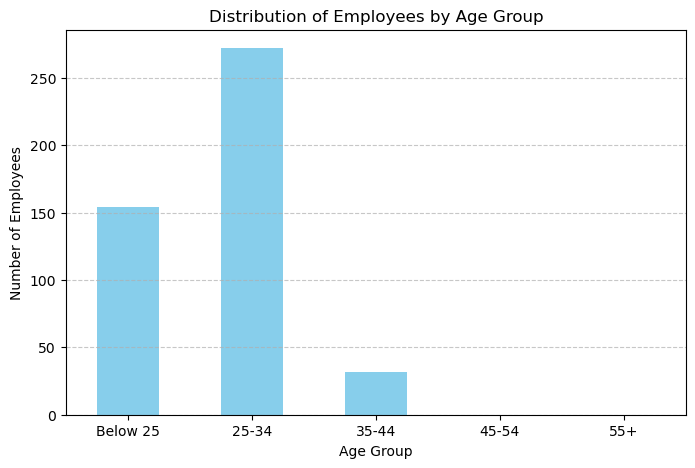

In [41]:
import matplotlib.pyplot as plt

# Plot the distribution of age groups
plt.figure(figsize=(8, 5))
age_distribution.plot(kind='bar', color='skyblue')

# Formatting the chart
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
# Group by 'team' and sum salaries
team_salary_expenditure = df.groupby('team')['salary'].sum().sort_values(ascending=False)

# Display the team with the highest salary expenditure
highest_paid_team = team_salary_expenditure.idxmax()
highest_team_salary = team_salary_expenditure.max()

print(f"🔹 The team with the highest salary expenditure is **{highest_paid_team}**, with a total salary cost of **${highest_team_salary:,.2f}**.")



🔹 The team with the highest salary expenditure is **Cleveland Cavaliers**, with a total salary cost of **$106,988,689.00**.


In [45]:
# Group by 'position' and sum salaries
position_salary_expenditure = df.groupby('position')['salary'].sum().sort_values(ascending=False)

# Display the position with the highest salary expenditure
highest_paid_position = position_salary_expenditure.idxmax()
highest_position_salary = position_salary_expenditure.max()

print(f"🔹 The position with the highest salary expenditure is **{highest_paid_position}**, with a total salary cost of **${highest_position_salary:,.2f}**.")


🔹 The position with the highest salary expenditure is **C**, with a total salary cost of **$466,377,332.00**.


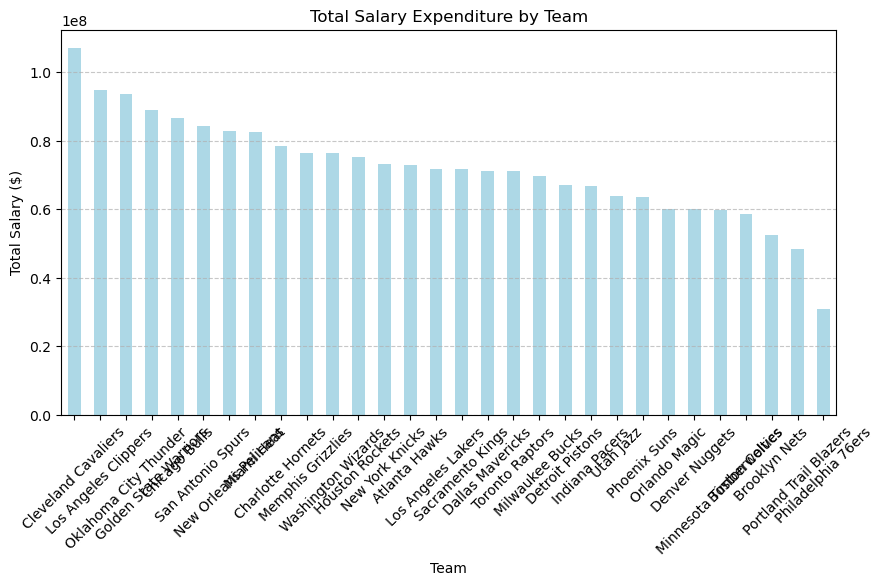

In [47]:
import matplotlib.pyplot as plt

# Plot team salary expenditure
plt.figure(figsize=(10, 5))
team_salary_expenditure.plot(kind='bar', color='lightblue')

# Formatting the chart
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



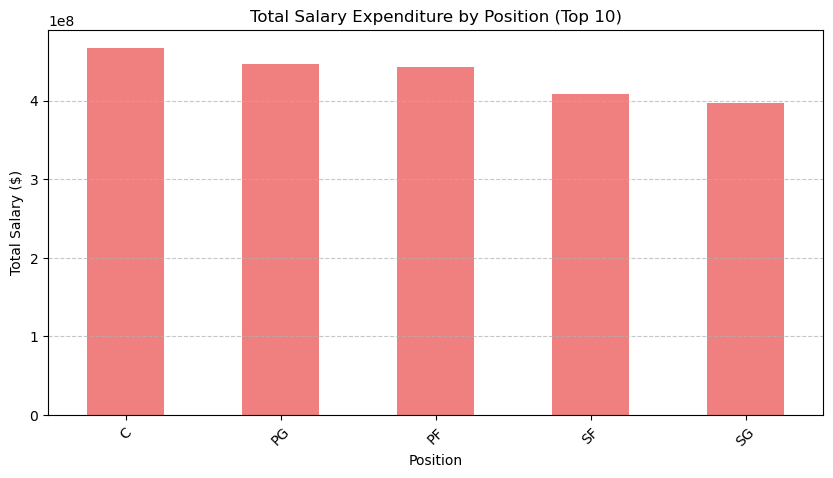

In [49]:
# Plot position salary expenditure
plt.figure(figsize=(10, 5))
position_salary_expenditure.head(10).plot(kind='bar', color='lightcoral')  # Show top 10 positions

# Formatting the chart
plt.title('Total Salary Expenditure by Position (Top 10)')
plt.xlabel('Position')
plt.ylabel('Total Salary ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [51]:
# Calculate correlation coefficient
correlation = df['age'].corr(df['salary'])

print(f"🔹 The correlation coefficient between age and salary is: {correlation:.2f}")



🔹 The correlation coefficient between age and salary is: 0.21


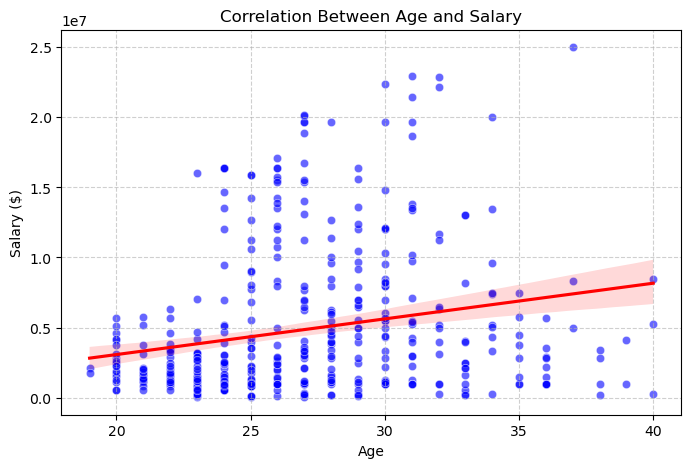

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['salary'], alpha=0.6, color="blue")

# Trend line
sns.regplot(x=df['age'], y=df['salary'], scatter=False, color='red')

# Formatting the chart
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

